### Evaluación de métricas y variables de los modelos arborescentes

In [21]:
import sys
sys.path.append("../../") # go to parent dir

In [22]:
from modelos import *
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import pandas as pd
import calplot
from pandas import DatetimeIndex

In [23]:
pd.options.display.max_columns = 50 # para mostrar todas las columnas

#### Cargamos los datos de las metricas de MLFlow para evaluar los modelos

In [62]:
runs = pd.read_csv('runs/runs-forest.csv')
runs

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,bootstrap,max_depth,min_samples_leaf,min_samples_split,n_estimators,random_state,CV_TEST_RMSE,CV_TRAIN_RMSE,RANDOM SEED,TEST_MAX_ERROR,TEST_MEAN_ABS_ERROR,TEST_MEDIAN_ABS_ERROR,TEST_ROOT_MEAN_SQ_ERROR,Training Info
0,2024-04-28 23:26:07,11.6s,7e4e9122bf42408ca67879e80814625e,esc_rf_con_grid_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,NaN,1.0,2.0,600.0,777,0.050450,0.006928,777,2.537000,0.272840,0.190750,0.386459,Random Forest donde los hiperparámetros se esc...
1,2024-04-28 22:52:00,13.7s,7af8fd9f47bc4d2696d8bdb0db616bc1,rf_con_grid_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,28.0,1.0,2.0,600.0,777,0.050518,0.006938,777,2.453833,0.272288,0.190250,0.385576,Random Forest donde los hiperparámetros se esc...
2,2024-04-28 22:16:58,6.7s,c00c7aaa3a614762bd8110fcb260e756,esc_rf_con_random_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,28.0,4.0,4.0,201.0,777,0.061150,0.024747,777,2.614159,0.273048,0.188845,0.388882,Random Forest donde los hiperparámetros se esc...
3,2024-04-28 22:14:17,7.0s,ac393e54499545f78a1c7cab7bedad90,rf_con_random_search,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,True,28.0,4.0,4.0,201.0,777,0.061129,0.024751,777,2.531724,0.272808,0.187096,0.388383,Random Forest donde los hiperparámetros se esc...
4,2024-04-28 22:12:06,5.7s,bb643a4e91564ecf9e88e21b4553c054,esc_random_forest_basico,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,NaN,10.0,NaN,NaN,NaN,777,0.262778,0.194255,777,2.542573,0.272665,0.187579,0.387846,Random Forest con todos los hiperparámetros pr...
5,2024-04-28 22:11:21,12.6s,481a8f31dc7442dca6bd58f018a51af3,random_forest_basico,LOCAL,C:\Users\dacoq\AppData\Roaming\Python\Python31...,dacoq,FINISHED,NaN,10.0,NaN,NaN,NaN,777,0.262738,0.194271,777,2.407003,0.272408,0.188076,0.386955,Random Forest con todos los hiperparámetros pr...


### RAIZ DE ECM por SUBCONJUNTOS

Pasamos a ver la diferencia entre el error (raiz del error cuadratico medio) de test de validación(CV_TEST_RMSE) con el error de train de validación (CV_TRAIN_RMSE) y el error sobre TEST (TEST_ROOT_MEAN_SQ_ERROR)

Text(0.5, 0, 'metros')

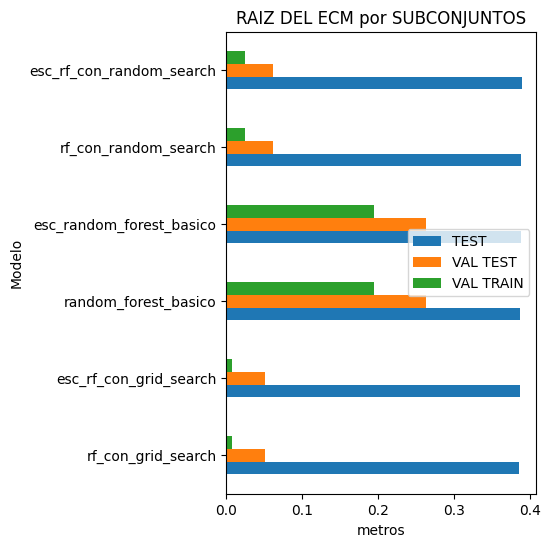

In [25]:
fig, ax = plt.subplots(figsize=(4,6))
runs = runs.sort_values(by='TEST_ROOT_MEAN_SQ_ERROR')

runs.plot(x = 'Name', y = ['TEST_ROOT_MEAN_SQ_ERROR', 'CV_TEST_RMSE', 'CV_TRAIN_RMSE' ], kind = 'barh', ax=ax)
plt.legend(['TEST', 'VAL TEST', 'VAL TRAIN'], loc='center right')
ax.set_title('RAIZ DEL ECM por SUBCONJUNTOS')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros')

#### Viendo esta gráfica podemos apreciar que el error sobre test suele estar muy por encima de los errores de validación

#### Entre los conjuntos de validación, también podemos destacar que el error de train es menor que el error de test

#### Además, comentar que el error del test es muy similar entre modelos

### Otras métricas sobre el conjunto TEST
#### Asignamos los colores al mismo modelo para que coincidan en las graficas posteriores

In [26]:
colors = ['#6CCFF6', '#BFF6FF', '#FF95FD', '#FFF93E', 'green', 'red']
dictCol = dict(zip(runs.Name.unique(), colors))
runs['color'] = runs.Name.map(dictCol)

#### Error absoluto medio

Al no usar cuadrados y raices es una métrica más precisa del error

Text(0.5, 0, 'metros (escala logaritmica)')

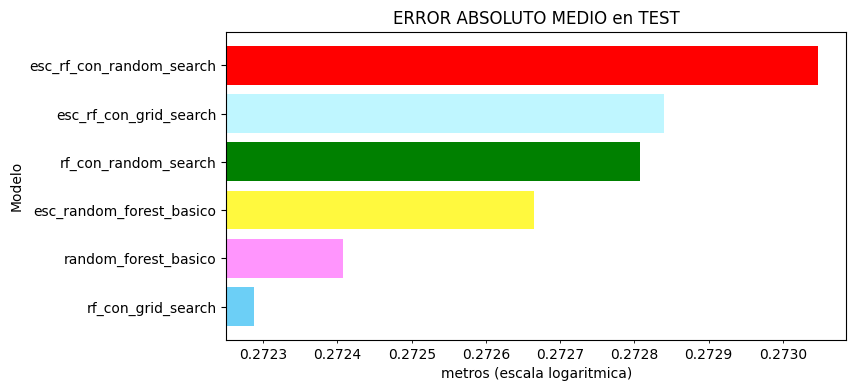

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
runs = runs.sort_values(by='TEST_MEAN_ABS_ERROR')

ax.barh(y = runs['Name'], width = runs['TEST_MEAN_ABS_ERROR'], color=runs.color)
ax.set_title('ERROR ABSOLUTO MEDIO en TEST')
# escala logaritmica
ax.set_xscale('log')
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.set_ylabel('Modelo')
ax.set_xlabel('metros (escala logaritmica)')

En este caso vemos que varía bastante el rango de este error con respecto a la raiz de ECM, es menor (hasta 0,5 en vez de 0,7 para raiz de ECM)

#### Mediana del error absoluto

En vez de usar la media, usamos la mediana para que no afecten tanto los errores extremos

Text(0.5, 0, 'metros (escala logaritmica)')

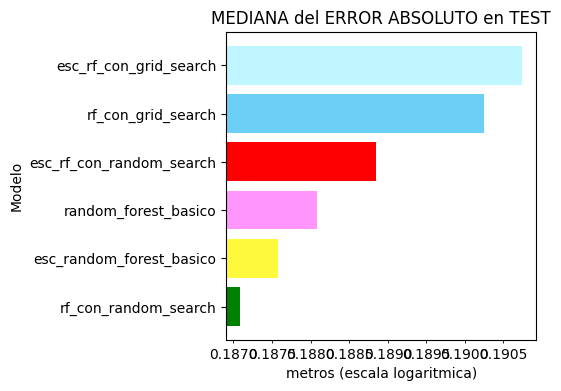

In [28]:
fig, ax = plt.subplots(figsize=(4,4))
runs = runs.sort_values(by='TEST_MEDIAN_ABS_ERROR')

ax.barh(y = runs['Name'], width = runs['TEST_MEDIAN_ABS_ERROR'], color=runs.color)
ax.set_title('MEDIANA del ERROR ABSOLUTO en TEST')
# escala logaritmica
ax.set_xscale('log')
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.set_ylabel('Modelo')
ax.set_xlabel('metros (escala logaritmica)')

En este caso también el rango baja respecto la anterior gráfica (no llega a 0,5 como en la anterior). Esto es lógico, pues en el anterior gráfico al coger la media se ve afectada por valores más extremos.

#### Error máximo:
Métrica importante y nos ayudará a tener en cuenta que modelos pueden funcionar mejor para predecir alturas de olas de todos los rangos

Text(0.5, 0, 'metros (escala logaritmica)')

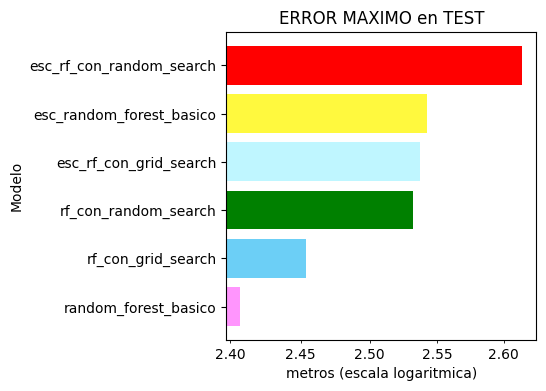

In [29]:
fig, ax = plt.subplots(figsize=(4,4))
runs = runs.sort_values(by='TEST_MAX_ERROR')

ax.barh(y = runs['Name'], width = runs['TEST_MAX_ERROR'], color=runs.color)
# escala logaritmica
ax.set_xscale('log')
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.set_title('ERROR MAXIMO en TEST')
ax.set_ylabel('Modelo')
ax.set_xlabel('metros (escala logaritmica)')

#### Vemos que los primeros tres gráficos no muestran diferencias mayores de 1 centimetro entre dos modelos. En la comparación del error máximo la diferencia puede llegar a unos 7 cm, pero aún así no es realmente muy importante. Por ello seguramente el modelo que seleccionemos sea el elastic con selecion manual encontrado con random search (color marron). Pues este modelo tiene menos variables que el modelo con todas las variables y la diferencia en el error maximo no es muy alta.

### Análisis de importancia de variables (valores de los coeficientes)

En esta seccion analisaremos los coeficientes de las variables en los modelos seleccionados.

In [30]:
# cargamos datos
X_train, X_test, y_train, y_test = sep_train_test()

#### Lo haremos separado para modelos escalados.y sin escalar, pues realmente no es una comparación igualada (aunque mas abajo lo juntaremos para ver las diferencias)

In [38]:
# las variables usadas en modelos sin utilizar seleccion
all_coef = X_train.drop(columns=["Temperatura", 'wspd', 'anio', 'mes', 'dia', 'hora']).columns

flo = MLFlow()

# cargamos los modelos con sus variables respectivas

models_sin_esc = [{'name': m, 'model': flo.get_saved_model(m), 'feature_names': all_coef} for m in runs.Name if 'esc' not in m]

models_escalados = [{'name': m, 'model': flo.get_saved_model(m), 'feature_names': all_coef} for m in runs.Name if 'esc' in m]

C:\Users\dacoq\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


#### Funcion auxiliar para guardar los datos correctamente para poder crear visualizaciones

In [39]:
def feat_weights_df(models):
    featureWeights = []
    for i,c in enumerate(all_coef):
        for item in models:
            featW = {'model': item['name'], 'coef': 0, 'color': 'black'}
    
            if (item['feature_names'] == c).sum() > 0: # si existe el coeficiente en el modelo
                featW['coef'] = item['model'].feature_importances_[item['feature_names'] == c][0]
                # color rojo indica que el coeficiente es negativo
                featW['color'] = 'blue' if featW['coef'] > 0 else 'red'
                featW['coef'] = abs(featW['coef'])
    
            featW['coef_name'] = c
            
            featureWeights.append(featW)
    # convertimos lista a dataframe
    return pd.DataFrame(featureWeights)

#### Funcion que se encargara de mostrar una rejilla de graficos para cada variable de cual es su peso en diferentes modelos

In [40]:
def mostrar_importancias(featureWeights, title):
    # ordenamos por coeficientes para que al mostrar sea mas facil evaluar
    featureWeights = featureWeights.sort_values(by = 'coef', ascending=False)
    
    fig, axs = plt.subplots(8,4, figsize=(15,30))
    fig.suptitle(title, fontsize=24)
    for i,c in enumerate(featureWeights.coef_name.unique()):
        df_temp = featureWeights[featureWeights.coef_name == c]
        df_temp = df_temp.sort_values(by='model')
        ax = axs[i//4, i%4]
        ax.barh(df_temp.model, df_temp.coef, color = df_temp.color)
        if i % 4 > 0:
            ax.set_yticks([])
        ax.set_title(c, fontweight='bold')
        ax.set_xticks([i/20 for i in range(0, 22, 5)])
        
    # leyenda custom
    # axs[0, 1].legend(handles=[mpatches.Patch(color='red', label='< 0'), mpatches.Patch(color='blue', label='> 0')])
    axs[7,3].axis('off')

#### Mostramos graficos para datos SIN escalar

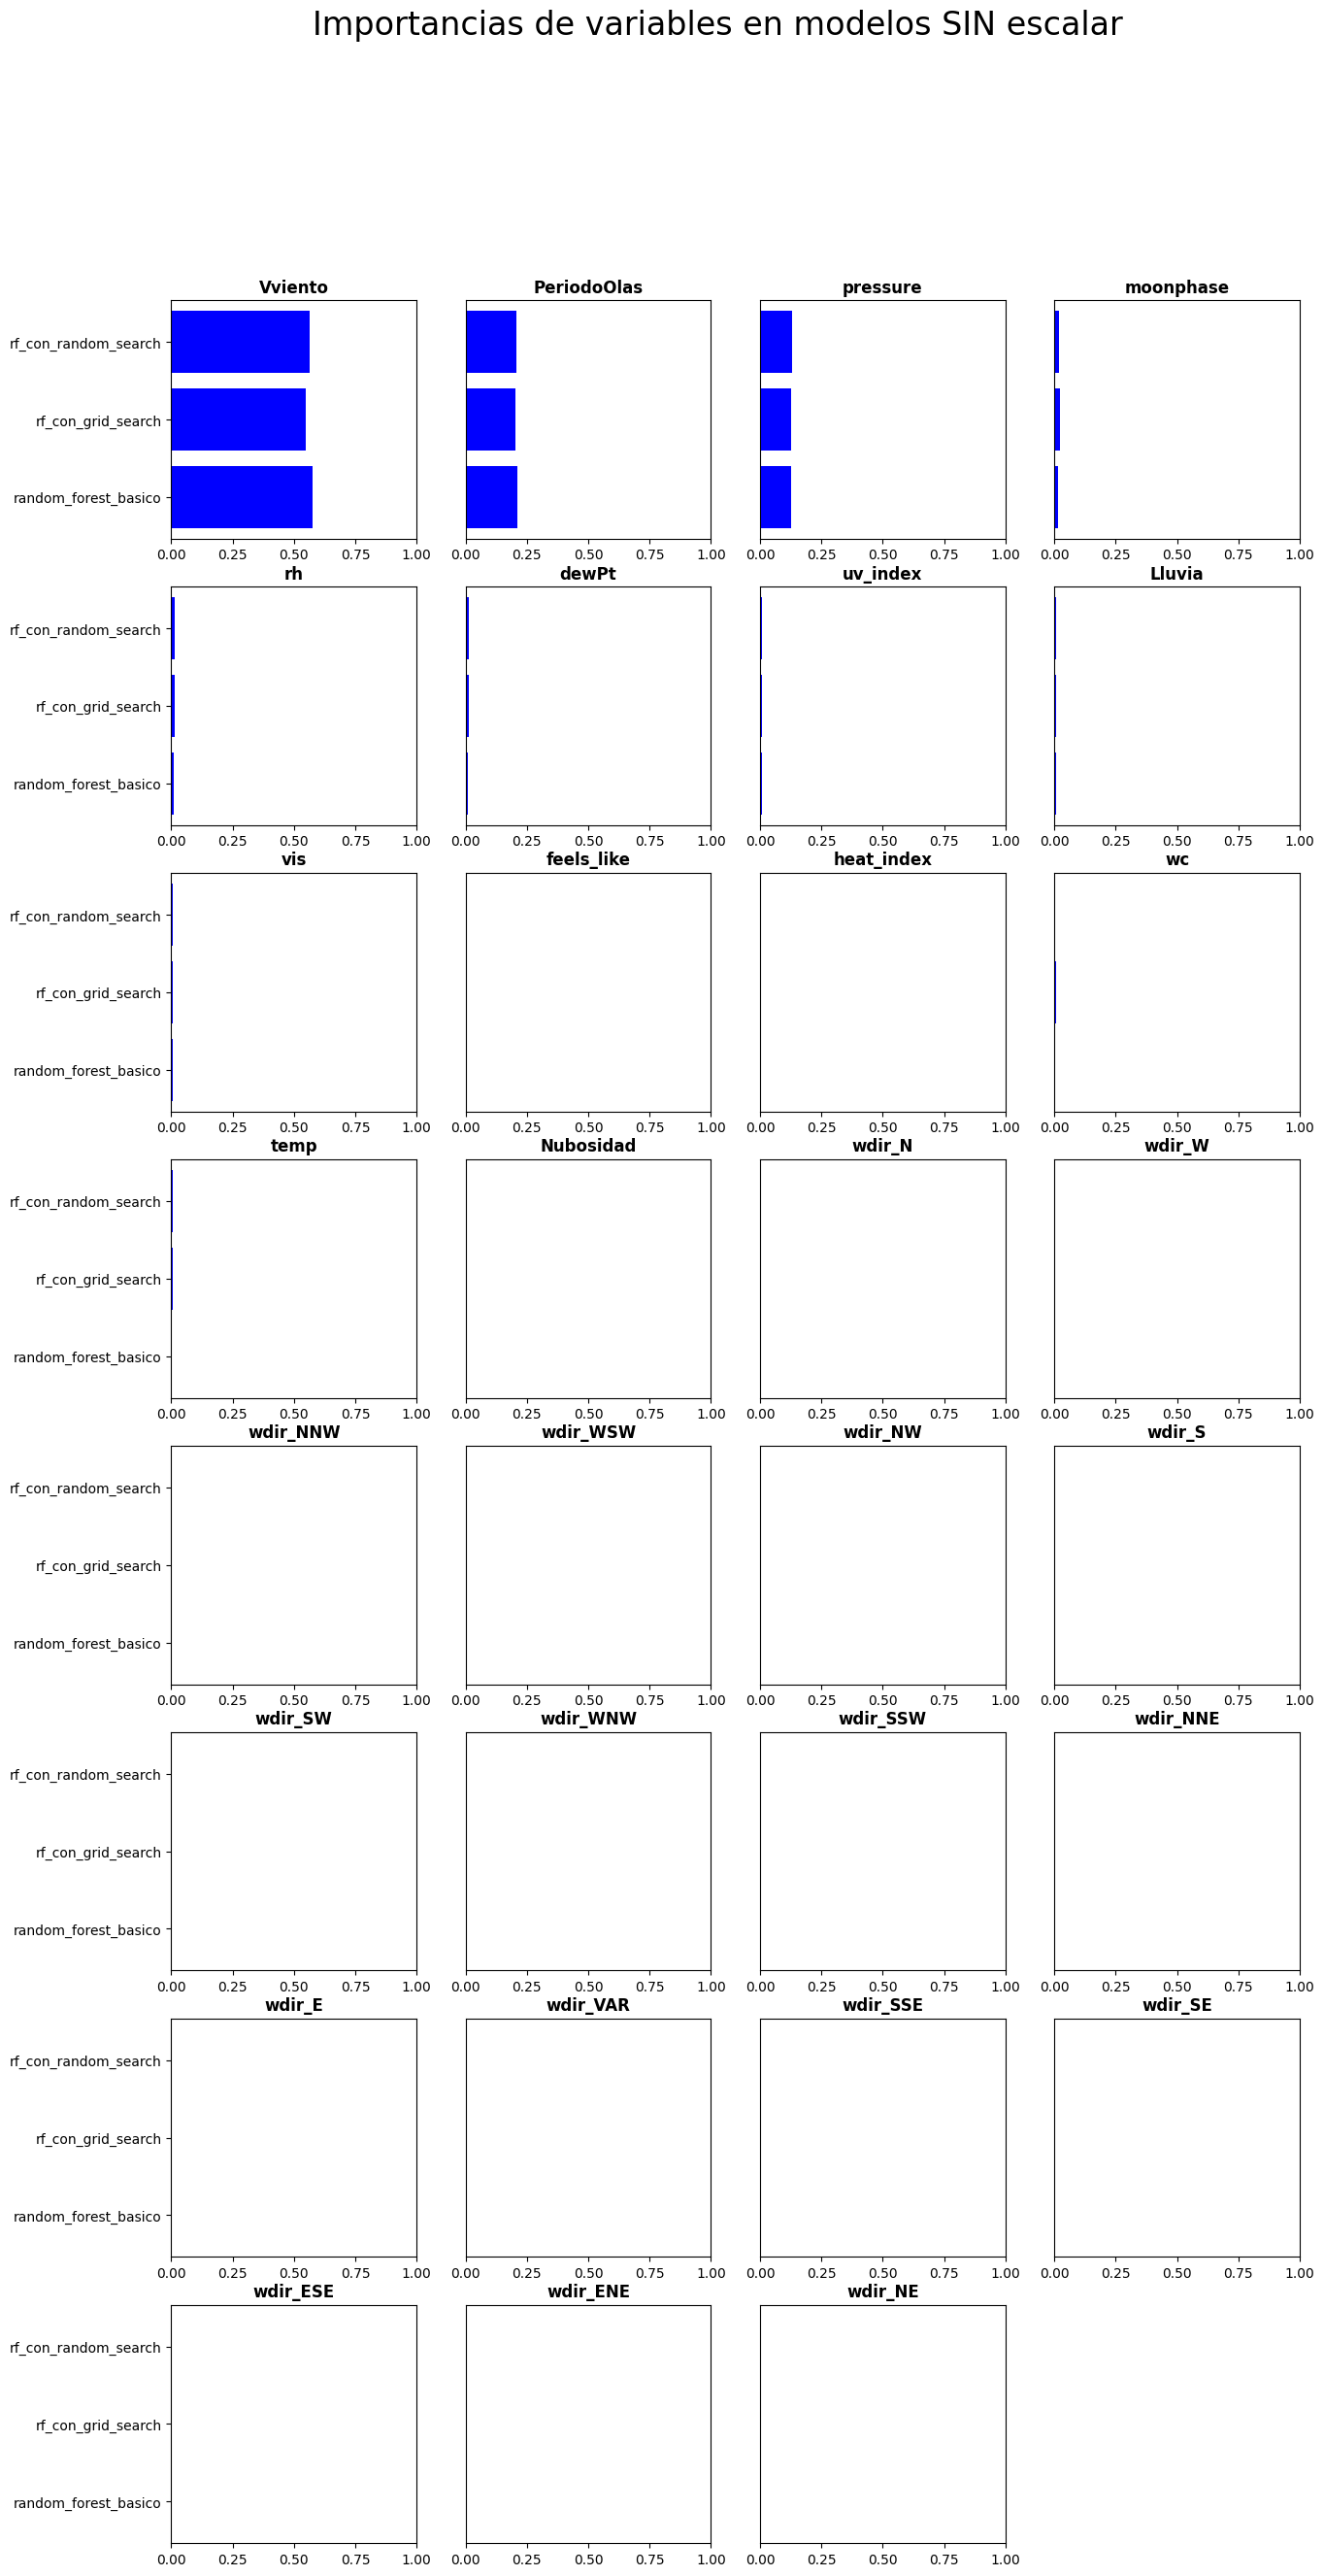

In [41]:
mostrar_importancias(feat_weights_df(models_sin_esc), "Importancias de variables en modelos SIN escalar")

#### En este caso, las variables de mayor peso son la presion y la direcion del viento en direccion Norte. Los coeficientes son muy parecidos, esto se debe a que 4 de 5 modelos son ELASTIC. Veamos si esto cambia para modelos escalados.

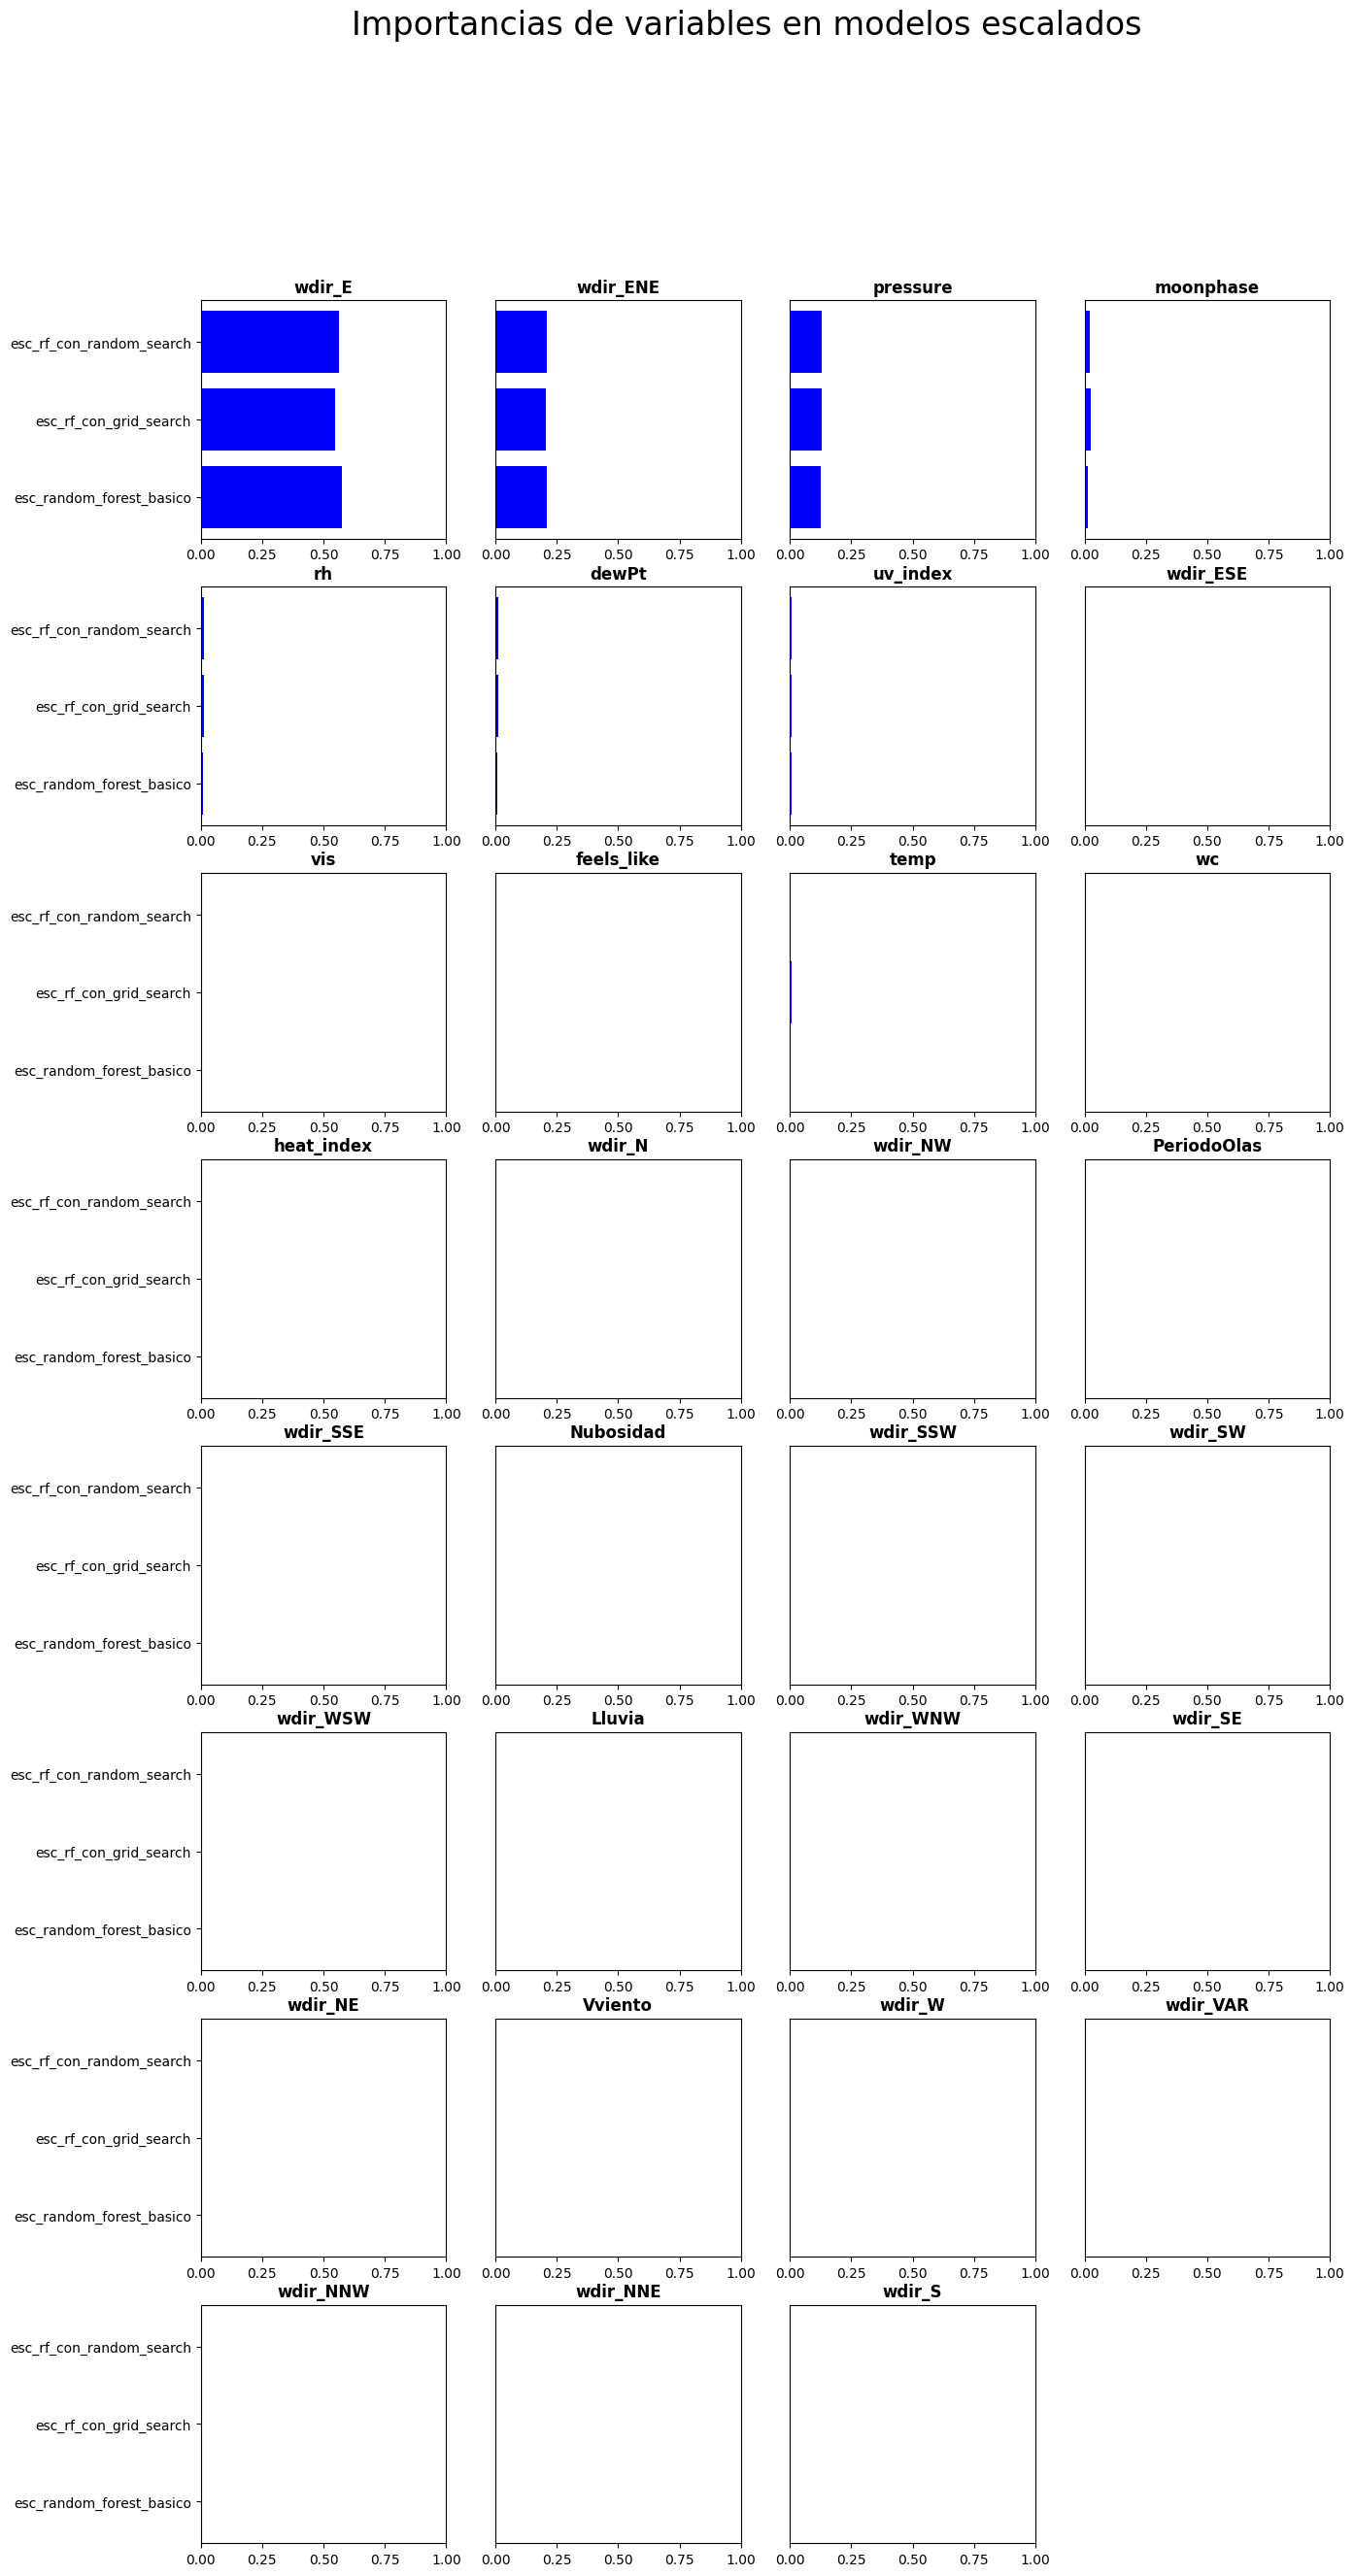

In [42]:
mostrar_importancias(feat_weights_df(models_escalados), "Importancias de variables en modelos escalados")

Vemos que las varaiables que tienen más importancia para los modelos sin escalar son en orden de importancia: VViento, PeriododOlas, pressure y también moonphase.

En cuanto a los modelos con datos escalados son wdir_E, wdir_ENE pressure y también moonphase.

### CONCLUSION

Por las m